In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from skimage import exposure, filters
# set the random seed for reproducibility
np.random.seed(42)

# set the image size and batch size
img_size = (224, 224)
batch_size = 64

In [5]:
import os
import sys
os.chdir("/kaggle/input/chest-xray-pneumonia/chest_xray")
os.listdir()

train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

In [6]:
os.mkdir("/kaggle/working/chest-xray-pneumonia")
os.mkdir("/kaggle/working/chest-xray-pneumonia/chest_xray")
os.mkdir("/kaggle/working/chest-xray-pneumonia/chest_xray/train")
os.mkdir("/kaggle/working/chest-xray-pneumonia/chest_xray/test")


In [14]:
def preprocess(img):
    
            img_resized = cv2.resize(img, (224, 224))
    

#             # normalize the pixel values of the image
            #img_norm = StandardScaler().fit_transform(img_resized.reshape(-1, 3)).reshape(img_resized.shape)

            # perform CLAHE  on the image
            # perform CLAHE on the image
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img_clahe = clahe.apply(img_resized[:,:,0])

            # sharpen the image using unsharp masking
            img_sharpened = cv2.GaussianBlur(img_clahe, (5,5), 0)
            img_sharpened = cv2.addWeighted(img_clahe, 1.5, img_sharpened, -0.5, 0)

            # apply a median filter to the image
            img_median = filters.median(img_sharpened) 
            return(img_median)

In [13]:
os.rmdir('/kaggle/working/chest-xray-pneumonia/chest_xray/test/PNEUMONIA')

In [15]:
for category in os.listdir(test_path):
    os.chdir(os.path.join(test_path,category))
    pathf = os.path.join("/kaggle/working/chest-xray-pneumonia/chest_xray/test",category)
    os.mkdir(pathf)
    print(category)
    
    for ix in os.listdir(): #Images
            img = cv2.imread(ix)
            img_median = preprocess(img)
            filename1 = str(pathf)+"/"+ix
            filename2 = str(pathf)+"/"+"modified_"+ix
#             cv2.imwrite(filename1,img)
            cv2.imwrite(filename2,img_median) # Saving Modified Image
            print(str(ix+"saved"))

PNEUMONIA
person1676_virus_2892.jpegsaved
person1650_virus_2852.jpegsaved
person22_virus_55.jpegsaved
person122_bacteria_582.jpegsaved
person85_bacteria_417.jpegsaved
person79_virus_148.jpegsaved
person29_virus_64.jpegsaved
person123_bacteria_587.jpegsaved
person75_virus_136.jpegsaved
person153_bacteria_725.jpegsaved
person173_bacteria_831.jpegsaved
person16_virus_47.jpegsaved
person138_bacteria_659.jpegsaved
person112_bacteria_538.jpegsaved
person83_bacteria_409.jpegsaved
person23_virus_56.jpegsaved
person80_bacteria_392.jpegsaved
person140_bacteria_667.jpegsaved
person3_virus_17.jpegsaved
person97_bacteria_468.jpegsaved
person1_virus_11.jpegsaved
person83_bacteria_410.jpegsaved
person127_bacteria_604.jpegsaved
person121_bacteria_578.jpegsaved
person1650_virus_2854.jpegsaved
person21_virus_52.jpegsaved
person82_bacteria_402.jpegsaved
person1685_virus_2903.jpegsaved
person82_bacteria_403.jpegsaved
person26_virus_60.jpegsaved
person1663_virus_2876.jpegsaved
person77_virus_139.jpegsaved


In [16]:
for category in os.listdir(test_path):
    os.chdir(os.path.join(test_path,category))
    pathf = os.path.join("/kaggle/working/chest-xray-pneumonia/chest_xray/train",category)
    os.mkdir(pathf)
    print(category)
    
    for ix in os.listdir(): #Images
            img = cv2.imread(ix)
            img_median = preprocess(img)
            filename1 = str(pathf)+"/"+ix
            filename2 = str(pathf)+"/"+"modified_"+ix
#             cv2.imwrite(filename1,img)
            cv2.imwrite(filename2,img_median) # Saving Modified Image
#             print(str(ix+"saved"))
print("SAVED")

PNEUMONIA
NORMAL
SAVED


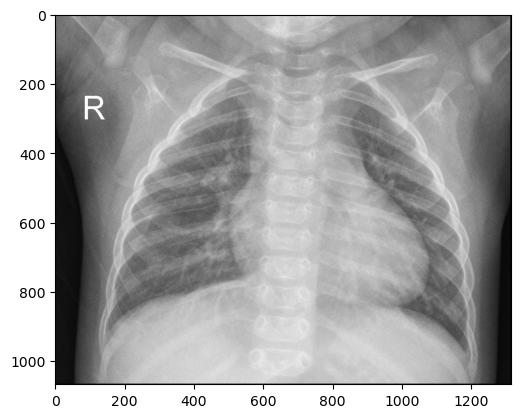

In [17]:
import matplotlib.pyplot as plt
img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1247-0001.jpeg")
plt.imshow(img,cmap='gray')

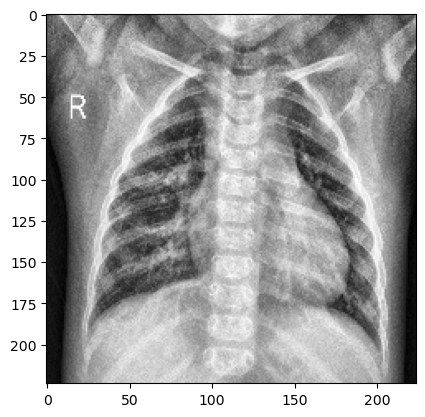

In [18]:
img_resized = cv2.resize(img, (224, 224))
      
#CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_resized[:,:,0])

plt.imshow(img_clahe,cmap='gray')

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_path1 = "/kaggle/working/chest-xray-pneumonia/chest_xray/train"
test_path1 = "/kaggle/working/chest-xray-pneumonia/chest_xray/test"
train_generator = train_datagen.flow_from_directory(train_path1,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                        
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')

base_model = tf.keras.applications.VGG16(input_shape=img_size + (3,),
                                         include_top=False,
                                         weights='imagenet')



Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model - Adam optimizer lr 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [24]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = val_generator.n//val_generator.batch_size

# train the model
hist = model.fit_generator(train_generator,
          steps_per_epoch=steps_per_epoch,
          epochs=20,
          validation_data=val_generator,
          validation_steps=validation_steps)

# evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy*100:.2f}%')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == "__main__":


Epoch 1/20
9/9 [==============================] - 34s 2s/step - loss: 1.1130 - accuracy: 0.5464
Epoch 2/20
9/9 [==============================] - 8s 834ms/step - loss: 0.6715 - accuracy: 0.6536
Epoch 3/20
9/9 [==============================] - 8s 827ms/step - loss: 0.4920 - accuracy: 0.7679
Epoch 4/20
9/9 [==============================] - 8s 877ms/step - loss: 0.4423 - accuracy: 0.8054
Epoch 5/20
9/9 [==============================] - 7s 789ms/step - loss: 0.3872 - accuracy: 0.8089
Epoch 6/20
9/9 [==============================] - 8s 845ms/step - loss: 0.3734 - accuracy: 0.8507
Epoch 7/20
9/9 [==============================] - 8s 841ms/step - loss: 0.3375 - accuracy: 0.8698
Epoch 8/20
9/9 [==============================] - 8s 783ms/step - loss: 0.3336 - accuracy: 0.8625
Epoch 9/20
9/9 [==============================] - 7s 791ms/step - loss: 0.3316 - accuracy: 0.8518
Epoch 10/20
9/9 [==============================] - 8s 843ms/step - loss: 0.3278 - accuracy: 0.8819
Epoch 11/20
9/9 [====

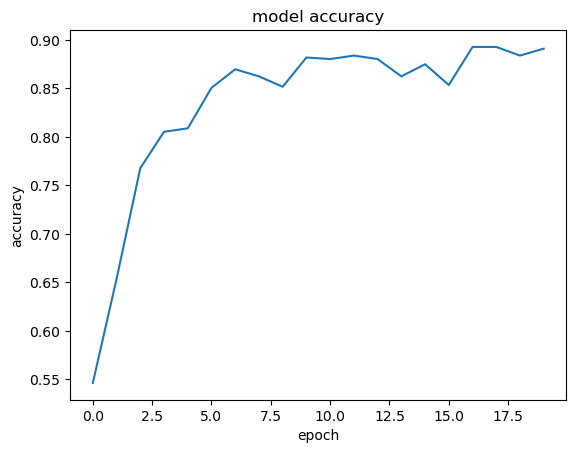

In [25]:

plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

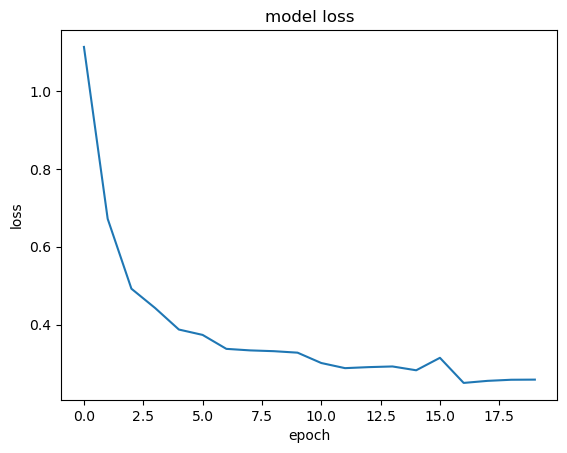

In [29]:

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()